##### Dataset

In [1]:
# Name: SMSSpamCollection
# Location: https://mitu.co.in/dataset

##### Import the libraries

In [2]:
import pandas as pd
import seaborn as sns

##### Read the data

In [3]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


##### Separate the input and output data

In [5]:
# input data
x = df['text']
y = df['label']

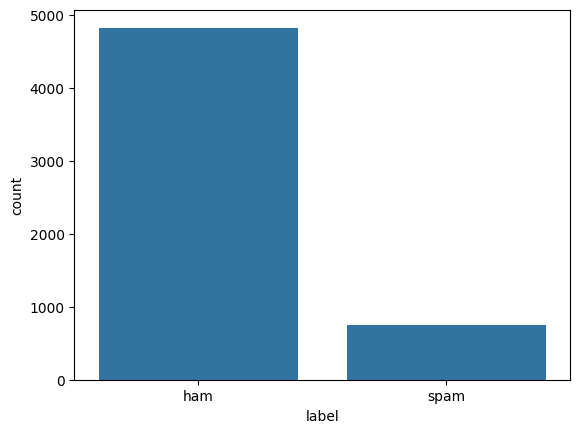

In [6]:
sns.countplot(x = y);

In [7]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


#### Data Preparation

##### Data Cleaning

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
swords = stopwords.words('english')

In [10]:
# define a function for text cleaning
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha()]
    tokens3 = [x for x in tokens2 if x not in swords]
    return tokens3

In [11]:
new_sent = 'It was the expected result. They told the same on fields.'

In [12]:
clean_text(new_sent)

['expected', 'result', 'told', 'fields']

##### TF*IDF Vectorization

In [13]:
# import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# create the object
tfidf = TfidfVectorizer(analyzer=clean_text)

In [15]:
# perform the operation
x_new = tfidf.fit_transform(x)

In [16]:
x_new.shape

(5572, 7217)

In [17]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [18]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

##### Encoding of output variable

In [19]:
# import the class
from sklearn.preprocessing import LabelEncoder

In [20]:
# create the object
le = LabelEncoder()

In [21]:
# apply the encoding
y_new = le.fit_transform(y)

In [22]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [23]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [24]:
le.inverse_transform([1])

array(['spam'], dtype=object)

##### Cross Validation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, random_state=0)

In [27]:
x_train.shape

(4179, 7217)

In [28]:
x_test.shape

(1393, 7217)

##### Define the neural network model

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [30]:
# create the object of NN model
model = Sequential()

# create first / input layer
layer1 = Dense(64, input_shape=(7217,), activation='relu')
model.add(layer1)

# create hidden layer
layer2 = Dense(128, activation='relu')
model.add(layer2)

# create the output layer
layer3 = Dense(1, activation='sigmoid') 
# multiclass: activation- softmax, number of neurons = number of classes
model.add(layer3)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                461952    
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 470401 (1.79 MB)
Trainable params: 470401 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Visualize the model

In [32]:
from keras.utils import plot_model

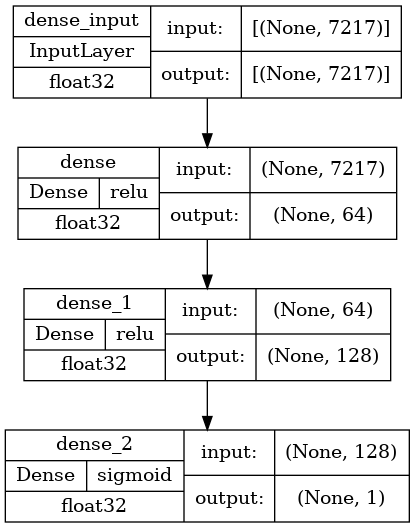

In [35]:
plot_model(model, show_dtype=True, show_layer_activations=True, show_layer_names=True,
          show_shapes=True)

In [64]:
pip install pydot graphviz

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 877.6 kB/s eta 0:00:00B/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


##### Compile the model

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# multi-class: loss='categorical_crossentropy'

##### Train the model

In [41]:
type(x_train)

scipy.sparse._csr.csr_matrix

In [42]:
model.fit(x_train.toarray(), y_train, epochs=10, batch_size=10)

Epoch 1/10
418/418 [==============================] - 4s 8ms/step - loss: 0.1886 - accuracy: 0.9352
Epoch 2/10
418/418 [==============================] - 3s 7ms/step - loss: 0.0275 - accuracy: 0.9921
Epoch 3/10
418/418 [==============================] - 3s 7ms/step - loss: 0.0066 - accuracy: 0.9983
Epoch 4/10
418/418 [==============================] - 4s 8ms/step - loss: 0.0028 - accuracy: 0.9995
Epoch 5/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0017 - accuracy: 0.9998
Epoch 6/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 7/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 8/10
418/418 [==============================] - 3s 7ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/10
418/418 [==============================] - 3s 8ms/step - loss: 0.0012 - accuracy: 0.9995
Epoch 10/10
418/418 [==============================] - 3s 7ms/step - loss: 0.0012 - accuracy: 0.9998

##### Evaluate the model on testing data

In [46]:
model.evaluate(x_test.toarray(), y_test, batch_size=1)

1393/1393 [==============================] - 2s 1ms/step - loss: 0.1015 - accuracy: 0.9785


[0.1014861986041069, 0.9784637689590454]

##### Prediction on unseen new data

In [48]:
# Dataset: sample.csv
# Location: https://mitu.co.in/dataset

In [49]:
f = open('sample.csv')

In [50]:
new_data = f.readlines()

In [51]:
new_data

['Ok lar i double check wif da hair dresser already he said wun cut v short. He said will cut until i look nice.,,\n',
 'As a valued customer, I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize, call 09066364589\n',
 '"Today is ""song dedicated day.."" Which song will u dedicate for me? Send this to all ur valuable frnds but first rply me...",,\n']

In [53]:
tfidf.transform(new_data).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
model.predict(tfidf.transform(new_data).toarray())

1/1 [==============================] - 0s 15ms/step


array([[7.7097689e-11],
       [9.9998266e-01],
       [7.4956217e-04]], dtype=float32)

In [56]:
pred = model.predict(tfidf.transform(new_data).toarray())

1/1 [==============================] - 0s 15ms/step


In [58]:
pred[0]

array([7.709769e-11], dtype=float32)

In [59]:
pred[1]

array([0.99998266], dtype=float32)

In [60]:
pred[2]

array([0.00074956], dtype=float32)

In [65]:
if pred[0] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['ham']


In [66]:
if pred[1] > 0.5:
    print(le.inverse_transform([1]))
else:
    print(le.inverse_transform([0]))

['spam']
